# HEAD

In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import max_error, mean_absolute_error as mae, median_absolute_error as medae, mean_squared_log_error as msle
from sklearn.metrics import r2_score,plot_confusion_matrix,confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
import cufflinks as cf
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz,DecisionTreeRegressor
from imblearn.over_sampling import SMOTE
from eli5 import show_weights
from eli5.sklearn import PermutationImportance
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [4]:
df = pd.read_csv('CreditCardDataset_cleaned.csv')
df

,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accnt_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
0,0,Air Miles,Letter,High,1,No,3,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,0,Air Miles,Letter,Medium,1,No,2,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,0,Air Miles,Postcard,High,2,No,2,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,0,Air Miles,Letter,Medium,2,No,3,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,0,Air Miles,Letter,Medium,1,No,2,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,0,Cash Back,Letter,High,1,No,1,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17972,0,Cash Back,Letter,High,1,No,1,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17973,0,Cash Back,Letter,High,1,No,1,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17974,0,Cash Back,Letter,Medium,1,No,2,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


# Making the dummy data

In [6]:
reward = pd.get_dummies(df['Reward'],prefix='Reward')
mailer = pd.get_dummies(df['Mailer_Type'],prefix='mailer')
income = pd.get_dummies(df['Income_Level'],prefix='income')
overdraw = pd.get_dummies(df['Overdraft_Protection'],prefix='overdraw')
creditcard = pd.get_dummies(df['Credit_Cards_Held'],prefix='CC')
homes = pd.get_dummies(df['Homes_Owned'],prefix='hold_home')


In [7]:
dtrain = df.copy()

In [8]:
dtrain = dtrain[['Offer_Accepted','Bank_Accnt_Open','Household_Size','Homes_Owned','Credit_Rating','Average_Balance','Q1_Balance','Q2_Balance','Q3_Balance','Q4_Balance']]
dtrain

,Offer_Accepted,Bank_Accnt_Open,Household_Size,Homes_Owned,Credit_Rating,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
0,0,1,4,1,3,1160.75,1669.0,877.0,1095.0,1002.0
1,0,1,5,2,2,147.25,39.0,106.0,78.0,366.0
2,0,2,2,1,2,276.50,367.0,352.0,145.0,242.0
3,0,2,4,1,3,1219.00,1578.0,1760.0,1119.0,419.0
4,0,1,6,1,2,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...
17971,0,1,5,1,1,167.50,136.0,65.0,71.0,398.0
17972,0,1,3,1,1,850.50,984.0,940.0,943.0,535.0
17973,0,1,4,1,1,1087.25,918.0,767.0,1170.0,1494.0
17974,0,1,2,2,2,1022.25,626.0,983.0,865.0,1615.0


In [9]:
dtrain = pd.concat([dtrain,reward,mailer,income,overdraw,creditcard,homes],axis=1)
dtrain

,Offer_Accepted,Bank_Accnt_Open,Household_Size,Homes_Owned,Credit_Rating,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,mailer_Letter,mailer_Postcard,income_High,income_Low,income_Medium,overdraw_No,overdraw_Yes,CC_1,CC_2,CC_3,CC_4,hold_home_1,hold_home_2,hold_home_3
0,0,1,4,1,3,1160.75,1669.0,877.0,1095.0,1002.0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
1,0,1,5,2,2,147.25,39.0,106.0,78.0,366.0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0
2,0,2,2,1,2,276.50,367.0,352.0,145.0,242.0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
3,0,2,4,1,3,1219.00,1578.0,1760.0,1119.0,419.0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0
4,0,1,6,1,2,1211.00,2140.0,1357.0,982.0,365.0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,0,1,5,1,1,167.50,136.0,65.0,71.0,398.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0
17972,0,1,3,1,1,850.50,984.0,940.0,943.0,535.0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
17973,0,1,4,1,1,1087.25,918.0,767.0,1170.0,1494.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
17974,0,1,2,2,2,1022.25,626.0,983.0,865.0,1615.0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0


# Split data train and test

In [10]:
X = dtrain.drop('Offer_Accepted',axis=1)
y = dtrain['Offer_Accepted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_train

,Bank_Accnt_Open,Household_Size,Homes_Owned,Credit_Rating,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,mailer_Letter,mailer_Postcard,income_High,income_Low,income_Medium,overdraw_No,overdraw_Yes,CC_1,CC_2,CC_3,CC_4,hold_home_1,hold_home_2,hold_home_3
16511,1,3,2,2,1104.25,2056.0,1013.0,801.0,547.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0
7683,1,3,1,1,1277.00,545.0,1398.0,1233.0,1932.0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0
9189,1,4,1,1,277.50,476.0,34.0,200.0,400.0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
13376,1,3,1,1,254.50,160.0,463.0,95.0,300.0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0
647,2,3,1,3,1133.75,1870.0,1271.0,678.0,716.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,3,1,3,1131.25,345.0,790.0,1434.0,1956.0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0
11964,2,4,1,1,986.75,1288.0,1234.0,1137.0,288.0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0
5390,2,6,1,2,601.50,581.0,714.0,550.0,561.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
860,1,4,1,1,161.00,43.0,33.0,234.0,334.0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0


In [17]:
y_train.value_counts()

0    11876
1      707
Name: Offer_Accepted, dtype: int64

# MODEL TRAINING

In [18]:
# split original data
X = dtrain.drop('Offer_Accepted',axis=1)
y = dtrain['Offer_Accepted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Binary Classification

https://machinelearningmastery.com/types-of-classification-in-machine-learning/
Binary classification refers to those classification tasks that have two class labels.

Examples include:

Email spam detection (spam or not).
Churn prediction (churn or not).
Conversion prediction (buy or not).
Typically, binary classification tasks involve one class that is the normal state and another class that is the abnormal state.

For example “not spam” is the normal state and “spam” is the abnormal state. Another example is “cancer not detected” is the normal state of a task that involves a medical test and “cancer detected” is the abnormal state.

The class for the normal state is assigned the class label 0 and the class with the abnormal state is assigned the class label 1.

It is common to model a binary classification task with a model that predicts a Bernoulli probability distribution for each example.

The Bernoulli distribution is a discrete probability distribution that covers a case where an event will have a binary outcome as either a 0 or 1. For classification, this means that the model predicts a probability of an example belonging to class 1, or the abnormal state.

Popular algorithms that can be used for binary classification include:

- Logistic Regression
- k-Nearest Neighbors
- Decision Trees
- Support Vector Machine
- Naive Bayes

## Logistic Regression

In [19]:
log = LogisticRegression(penalty='none',class_weight='balanced',multi_class='multinomial',solver='newton-cg')
log.fit(X_train,y_train)
prediction = log.predict(X_test)
predx1 = log.predict_proba(X_test)
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.65      0.78      5079
           1       0.12      0.77      0.21       314

    accuracy                           0.65      5393
   macro avg       0.55      0.71      0.49      5393
weighted avg       0.93      0.65      0.75      5393

[[3283 1796]
 [  71  243]]


In [20]:
predprob_ov1 = []
for i in predx1[:,0]:
    if i > 0.8779:
        predprob_ov1.append(0)
    else:
        predprob_ov1.append(1)
        
out1 = pd.DataFrame(confusion_matrix(y_test,predprob_ov1),columns=['pred_declined','pred_accepted'],
                  index=['act_declined','act_accepted'])
out1

,pred_declined,pred_accepted
act_declined,342,4737
act_accepted,1,313


In [21]:
print(accuracy_score(y_test,prediction))
pd.crosstab(y_test,prediction)

0.6538104950862229


col_0,0,1
Offer_Accepted,,
0,3283,1796
1,71,243


In [22]:
probpred1 = predx1[:,1]
fpr1, tpr1, threshold1 = roc_curve(y_test, probpred1)
roc_auc1 = auc(fpr1, tpr1)

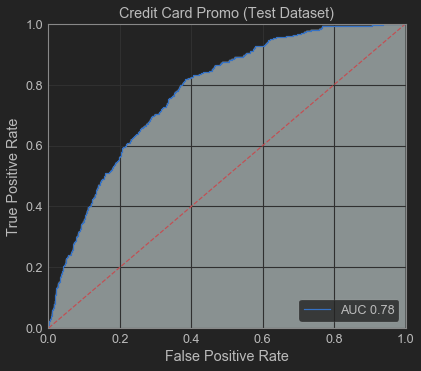

In [23]:
plt.title('Credit Card Promo (Test Dataset)')
plt.plot(fpr1, tpr1, 'b', label = 'AUC {}'.format(round(roc_auc1,2)))
plt.legend(loc='lower right') # posisi legend
plt.plot([1,0], [1,0], 'r--') # buat garis lurus dari kiri bawah, ke kanan atas
plt.xlim([0,1]) # sumbu x minimal di 0 maksimal di 1
plt.ylim([0,1]) # sumbu y minimal di 0 maksimal di 1
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fpr1, tpr1, 0, facecolor='azure',alpha=0.5)
plt.show()

In [24]:
roc_df = pd.DataFrame({'fpr': fpr1, 'tpr': tpr1, 'threshold':threshold1})
roc_df

,fpr,tpr,threshold
0,0.000000,0.000000,1.896325
1,0.000000,0.003185,0.896325
2,0.000000,0.006369,0.892894
3,0.000197,0.006369,0.887396
4,0.000197,0.009554,0.886595
...,...,...,...
563,0.905493,0.993631,0.136600
564,0.905493,0.996815,0.136579
565,0.935814,0.996815,0.120325
566,0.935814,1.000000,0.120270


In [25]:
roc_df[roc_df['tpr'] >= 0.8].sort_values('fpr')

,fpr,tpr,threshold
442,0.374483,0.802548,0.483628
443,0.375468,0.802548,0.481957
444,0.375468,0.805732,0.481766
445,0.378027,0.805732,0.479860
446,0.378027,0.808917,0.479819
...,...,...,...
563,0.905493,0.993631,0.136600
564,0.905493,0.996815,0.136579
566,0.935814,1.000000,0.120270
565,0.935814,0.996815,0.120325


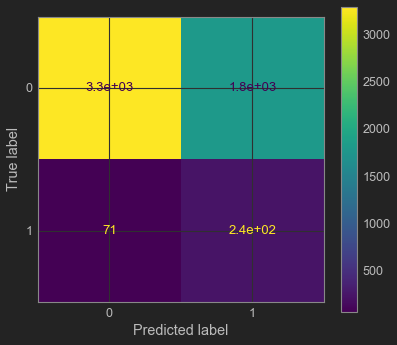

In [26]:
plot_confusion_matrix(log, X_test, y_test)

## K-Nearest Neighbor

In [27]:
neigh = KNeighborsClassifier(n_neighbors=2,weights='distance',algorithm='brute',
                             metric='euclidean',leaf_size=50,p=3,n_jobs=-1)
neigh.fit(X_train,y_train)
knpred = neigh.predict(X_test)
knprob = neigh.predict_proba(X_test)
print(classification_report(y_test,knpred))
print(confusion_matrix(y_test,knpred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5079
           1       0.06      0.06      0.06       314

    accuracy                           0.89      5393
   macro avg       0.50      0.50      0.50      5393
weighted avg       0.89      0.89      0.89      5393

[[4788  291]
 [ 294   20]]


In [28]:
nprob = knprob[:,1]
fprkn, tprkn, thresholdkn = roc_curve(y_test, nprob)
roc_auckn = auc(fprkn, tprkn)

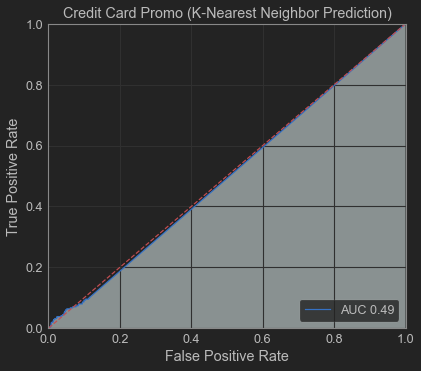

In [29]:
plt.title('Credit Card Promo (K-Nearest Neighbor Prediction)')
plt.plot(fprkn, tprkn, 'b', label = 'AUC {}'.format(round(roc_auckn,2)))
plt.legend(loc='lower right') # posisi legend
plt.plot([1,0], [1,0], 'r--') # buat garis lurus dari kiri bawah, ke kanan atas
plt.xlim([0,1]) # sumbu x minimal di 0 maksimal di 1
plt.ylim([0,1]) # sumbu y minimal di 0 maksimal di 1
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fprkn, tprkn, 0, facecolor='azure',alpha=0.5)
plt.show()

## DecisionTreeClassifier / Classification Trees

In [30]:
dst = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=100,
                             min_samples_split=10,max_features=26,random_state=3,
                             min_samples_leaf=40,max_leaf_nodes=40,class_weight='balanced')
dst.fit(X_train,y_train)
dst_pred = dst.predict(X_test)
dst_prob = dst.predict_proba(X_test)
print(classification_report(y_test,dst_pred))
print(confusion_matrix(y_test,dst_pred))

              precision    recall  f1-score   support

           0       0.98      0.55      0.71      5079
           1       0.10      0.83      0.18       314

    accuracy                           0.57      5393
   macro avg       0.54      0.69      0.45      5393
weighted avg       0.93      0.57      0.68      5393

[[2814 2265]
 [  54  260]]


In [31]:
dstprob = dst_prob[:,1]
fprdst, tprdst, thresholddst = roc_curve(y_test, dstprob)
roc_aucdst = auc(fprdst, tprdst)

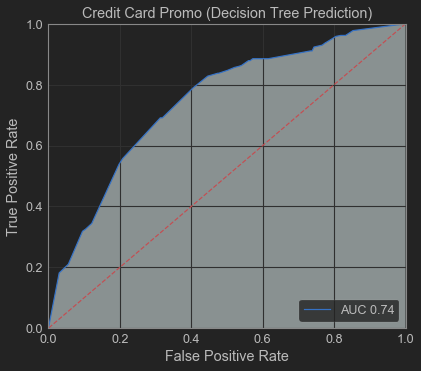

In [32]:
plt.title('Credit Card Promo (Decision Tree Prediction)')
plt.plot(fprdst, tprdst, 'b', label = 'AUC {}'.format(round(roc_aucdst,2)))
plt.legend(loc='lower right') # posisi legend
plt.plot([1,0], [1,0], 'r--') # buat garis lurus dari kiri bawah, ke kanan atas
plt.xlim([0,1]) # sumbu x minimal di 0 maksimal di 1
plt.ylim([0,1]) # sumbu y minimal di 0 maksimal di 1
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fprdst, tprdst, 0, facecolor='azure',alpha=0.5)
plt.show()

## ADABoost

In [33]:
ada = AdaBoostClassifier(base_estimator=dst, n_estimators=54, 
                         learning_rate=0.11, algorithm='SAMME',random_state=2)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_prob = ada.predict_proba(X_test)
print(classification_report(y_test,ada_pred))
print(confusion_matrix(y_test,ada_pred))

              precision    recall  f1-score   support

           0       0.98      0.58      0.73      5079
           1       0.11      0.80      0.19       314

    accuracy                           0.59      5393
   macro avg       0.54      0.69      0.46      5393
weighted avg       0.93      0.59      0.70      5393

[[2953 2126]
 [  63  251]]


In [34]:
adarob = ada_prob[:,1]
fprada, tprada, thresholdada = roc_curve(y_test, adarob)
roc_aucada = auc(fprada, tprada)

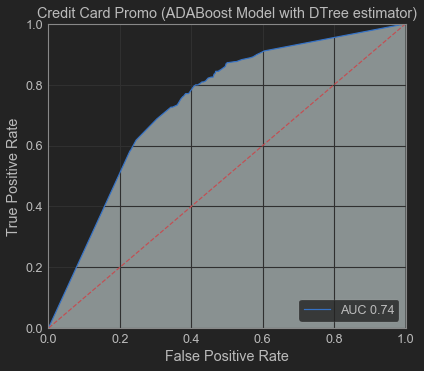

In [35]:
plt.title('Credit Card Promo (ADABoost Model with DTree estimator)')
plt.plot(fprada, tprada, 'b', label = 'AUC {}'.format(round(roc_aucada,2)))
plt.legend(loc='lower right') # posisi legend
plt.plot([1,0], [1,0], 'r--') # buat garis lurus dari kiri bawah, ke kanan atas
plt.xlim([0,1]) # sumbu x minimal di 0 maksimal di 1
plt.ylim([0,1]) # sumbu y minimal di 0 maksimal di 1
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fprada, tprada, 0, facecolor='azure',alpha=0.5)
plt.show()

In [83]:
ada.feature_importances_

array([0.00846032, 0.01789844, 0.0074182 , 0.35601676, 0.00659112,
       0.02392259, 0.02188071, 0.01929368, 0.03110659, 0.00761171,
       0.14937831, 0.01718887, 0.07924969, 0.05819903, 0.02580911,
       0.11249729, 0.01135574, 0.00261161, 0.00191589, 0.01664636,
       0.01485638, 0.00227993, 0.        , 0.00781168, 0.        ,
       0.        ])

In [84]:
feature_importance = pd.DataFrame(data=(X_up.columns,ada.feature_importances_)).T
feature_importance

,0,1
0,Bank_Accnt_Open,0.00846032
1,Household_Size,0.0178984
2,Homes_Owned,0.0074182
3,Credit_Rating,0.356017
4,Average_Balance,0.00659112
5,Q1_Balance,0.0239226
6,Q2_Balance,0.0218807
7,Q3_Balance,0.0192937
8,Q4_Balance,0.0311066
9,Reward_Air Miles,0.00761171


In [85]:
feature_importance.sort_values(by=1,ascending=False,inplace=True)

In [86]:
feature_importance

,0,1
3,Credit_Rating,0.356017
10,Reward_Cash Back,0.149378
15,income_Low,0.112497
12,mailer_Letter,0.0792497
13,mailer_Postcard,0.058199
8,Q4_Balance,0.0311066
14,income_High,0.0258091
5,Q1_Balance,0.0239226
6,Q2_Balance,0.0218807
7,Q3_Balance,0.0192937


In [93]:
list_x = []
for i in feature_importance[0]:
    list_x.append(i)
    
list_x

['Credit_Rating',
 'Reward_Cash Back',
 'income_Low',
 'mailer_Letter',
 'mailer_Postcard',
 'Q4_Balance',
 'income_High',
 'Q1_Balance',
 'Q2_Balance',
 'Q3_Balance',
 'Household_Size',
 'Reward_Points',
 'CC_1',
 'CC_2',
 'income_Medium',
 'Bank_Accnt_Open',
 'hold_home_1',
 'Reward_Air Miles',
 'Homes_Owned',
 'Average_Balance',
 'overdraw_No',
 'CC_3',
 'overdraw_Yes',
 'CC_4',
 'hold_home_2',
 'hold_home_3']

In [95]:
list_s = []
for i in feature_importance[feature_importance[1]>0.003][0]:
    list_s.append(i)
    
list_s.append('Offer_Accepted')
list_s

['Credit_Rating',
 'Reward_Cash Back',
 'income_Low',
 'mailer_Letter',
 'mailer_Postcard',
 'Q4_Balance',
 'income_High',
 'Q1_Balance',
 'Q2_Balance',
 'Q3_Balance',
 'Household_Size',
 'Reward_Points',
 'CC_1',
 'CC_2',
 'income_Medium',
 'Bank_Accnt_Open',
 'hold_home_1',
 'Reward_Air Miles',
 'Homes_Owned',
 'Average_Balance',
 'Offer_Accepted']

In [101]:
# new_DF = []
new_DF = upsampleDF.copy()

In [102]:
new_DF=new_DF[list_s]

## Naive Bayes Classifier

In [36]:
nbc = GaussianNB()
nbc.fit(X_train,y_train)
nbcpred=nbc.predict(X_test)
print(classification_report(y_test,nbcpred))
print(confusion_matrix(y_test,nbcpred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5079
           1       0.15      0.06      0.08       314

    accuracy                           0.93      5393
   macro avg       0.55      0.52      0.52      5393
weighted avg       0.90      0.93      0.91      5393

[[4979  100]
 [ 296   18]]


## Gradient Boost

In [28]:
gradient = GradientBoostingClassifier(loss='exponential',learning_rate = 0.2,n_estimators=500,
                                      subsample=0.5,criterion='friedman_mse',
                                     min_samples_leaf=3,min_weight_fraction_leaf=0.1,
                                     max_depth=4,min_impurity_decrease=0.1,
                                     random_state=2,max_features='auto',max_leaf_nodes=5,
                                     warm_start=True,validation_fraction=0.1)
gradient.fit(X_train, y_train)
gb_pred = gradient.predict(X_test)
gb_prob = gradient.predict_proba(X_test)
print(classification_report(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5079
           1       0.27      0.01      0.02       314

    accuracy                           0.94      5393
   macro avg       0.61      0.50      0.49      5393
weighted avg       0.90      0.94      0.91      5393

[[5071    8]
 [ 311    3]]


## SVC

In [61]:
clf = SVC(kernel='linear',max_iter=1,class_weight='balanced',decision_function_shape='ovr',
          random_state=1,probability=1.0)
clf.fit(X_train,y_train)
clf.predict(X_test)
svc_pred = clf.predict(X_test)
print(classification_report(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.94      0.47      0.63      5079
           1       0.06      0.55      0.11       314

    accuracy                           0.48      5393
   macro avg       0.50      0.51      0.37      5393
weighted avg       0.89      0.48      0.60      5393

[[2396 2683]
 [ 142  172]]


C:\Users\ryani\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning:

Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



In [44]:
svc_prob = clf.predict_proba(X_test)

In [45]:
svtprob = svc_prob[:,1]
fprsvt, tprsvt, thresholdsvt = roc_curve(y_test, svtprob)
roc_aucsvt = auc(fprsvt, tprsvt)

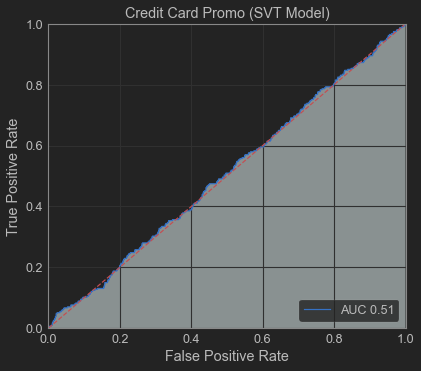

In [46]:
plt.title('Credit Card Promo (SVT Model)')
plt.plot(fprsvt, tprsvt, 'b', label = 'AUC {}'.format(round(roc_aucsvt,2)))
plt.legend(loc='lower right') # posisi legend
plt.plot([1,0], [1,0], 'r--') # buat garis lurus dari kiri bawah, ke kanan atas
plt.xlim([0,1]) # sumbu x minimal di 0 maksimal di 1
plt.ylim([0,1]) # sumbu y minimal di 0 maksimal di 1
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fprsvt, tprsvt, 0, facecolor='azure',alpha=0.5)
plt.show()

## Grid Search Cross Validation

### DO NOT RE-START THE CODE

In [77]:
rfc = RandomForestClassifier(bootstrap=True, criterion='gini', max_features='auto',
                             oob_score=True, random_state=42)
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [121]:
param_grid = {
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_depth': [100,200],
    'min_samples_split': [2,5,7],
    'n_estimators': [300,400,500],
    'min_samples_leaf' : [2,3,4],
    'class_weight': ['dict','list of dict','balanced']
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [122]:
grid_search.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 100,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 500}

In [123]:
rfc_grid = grid_search.best_estimator_

In [124]:
grid_pred = rfc_grid.predict(X_test)
grid_proba = rfc_grid.predict_proba(X_test)

In [125]:
print(classification_report(y_test, grid_pred))
print(confusion_matrix(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5079
           1       0.14      0.02      0.04       314

    accuracy                           0.94      5393
   macro avg       0.54      0.51      0.50      5393
weighted avg       0.90      0.94      0.91      5393

[[5036   43]
 [ 307    7]]


In [126]:
grprob = svc_prob[:,1]
fprgr, tprgr, thresholdgr = roc_curve(y_test, grprob)
roc_aucgr = auc(fprgr, tprgr)

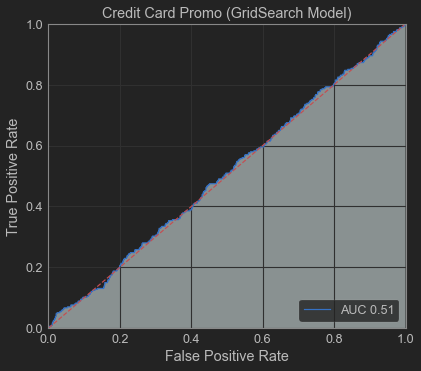

In [127]:
plt.title('Credit Card Promo (GridSearch Model)')
plt.plot(fprgr, tprgr, 'b', label = 'AUC {}'.format(round(roc_aucgr,2)))
plt.legend(loc='lower right') # posisi legend
plt.plot([1,0], [1,0], 'r--') # buat garis lurus dari kiri bawah, ke kanan atas
plt.xlim([0,1]) # sumbu x minimal di 0 maksimal di 1
plt.ylim([0,1]) # sumbu y minimal di 0 maksimal di 1
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fprgr, tprgr, 0, facecolor='azure',alpha=0.5)
plt.show()

# Imbalanced Classification

Imbalanced classification refers to classification tasks where the number of examples in each class is unequally distributed.

Typically, imbalanced classification tasks are binary classification tasks where the majority of examples in the training dataset belong to the normal class and a minority of examples belong to the abnormal class.

Examples include:

Fraud detection.
Outlier detection.
Medical diagnostic tests.
These problems are modeled as binary classification tasks, although may require specialized techniques.

Specialized techniques may be used to change the composition of samples in the training dataset by undersampling the majority class or oversampling the majority class.

Examples include:

- Random Undersampling.
- SMOTE Oversampling.

Specialized modeling algorithms may be used that pay more attention to the minority class when fitting the model on the training dataset, such as cost-sensitive machine learning algorithms.

## SMOTE

In [128]:
smote = SMOTE(random_state=42, sampling_strategy=1.0, k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [129]:
X_train_smote

,Bank_Accnt_Open,Household_Size,Homes_Owned,Credit_Rating,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,mailer_Letter,mailer_Postcard,income_High,income_Low,income_Medium,overdraw_No,overdraw_Yes,CC_1,CC_2,CC_3,CC_4,hold_home_1,hold_home_2,hold_home_3
0,1,3,2,2,1104.250000,2056.000000,1013.000000,801.000000,547.000000,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0
1,1,3,1,1,1277.000000,545.000000,1398.000000,1233.000000,1932.000000,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0
2,1,4,1,1,277.500000,476.000000,34.000000,200.000000,400.000000,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
3,1,3,1,1,254.500000,160.000000,463.000000,95.000000,300.000000,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0
4,2,3,1,3,1133.750000,1870.000000,1271.000000,678.000000,716.000000,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23747,1,3,1,1,741.581601,896.130447,673.494803,844.293506,552.407648,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
23748,1,2,1,1,956.151003,283.474332,813.218449,1948.072186,779.839044,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0
23749,1,4,1,1,1123.895936,916.591204,972.735127,1382.035146,1224.222267,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
23750,1,4,1,1,1270.952614,441.675089,1621.862813,1604.931406,1415.341150,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [130]:
y_train_smote

0        0
1        0
2        0
3        0
4        0
        ..
23747    1
23748    1
23749    1
23750    1
23751    1
Name: Offer_Accepted, Length: 23752, dtype: int64

In [131]:
y_train_smote.value_counts()

1    11876
0    11876
Name: Offer_Accepted, dtype: int64

In [141]:
smlogreg = LogisticRegression(class_weight='balanced',multi_class='multinomial')
smlogreg.fit(X_train_smote, y_train_smote)
smpred = smlogreg.predict(X_test)
smproba = smlogreg.predict_proba(X_test)
print(classification_report(y_test, smpred))
print(confusion_matrix(y_test,smpred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      5079
           1       0.15      0.26      0.19       314

    accuracy                           0.87      5393
   macro avg       0.55      0.58      0.56      5393
weighted avg       0.91      0.87      0.89      5393

[[4630  449]
 [ 233   81]]


C:\Users\ryani\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [147]:
dst_sm = DecisionTreeClassifier(class_weight='balanced')
dst_sm.fit(X_train_smote,y_train_smote)
dst_predsm = dst_sm.predict(X_test)
dst_probsm = dst_sm.predict_proba(X_test)
print(classification_report(y_test,dst_predsm))
print(confusion_matrix(y_test,dst_predsm))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      5079
           1       0.08      0.10      0.09       314

    accuracy                           0.88      5393
   macro avg       0.51      0.51      0.51      5393
weighted avg       0.89      0.88      0.89      5393

[[4713  366]
 [ 282   32]]


## Oversampling /Random Oversampling

In [37]:
df_copy = df.copy()
new_int = []
for i in df_copy['Offer_Accepted']:
    if i == 'No':
        new_int.append(0)
    else:
        new_int.append(1)
df_copy['Offer_Accepted']=new_int
df_copy.dropna(axis=0,inplace=True)
df_copy

,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accnt_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
0,1,Air Miles,Letter,High,1,No,3,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,1,Air Miles,Letter,Medium,1,No,2,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,1,Air Miles,Postcard,High,2,No,2,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,1,Air Miles,Letter,Medium,2,No,3,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,1,Air Miles,Letter,Medium,1,No,2,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,1,Cash Back,Letter,High,1,No,1,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17972,1,Cash Back,Letter,High,1,No,1,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17973,1,Cash Back,Letter,High,1,No,1,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17974,1,Cash Back,Letter,Medium,1,No,2,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


In [38]:
df_train = pd.concat([X_train,y_train],axis=1)
df_train

,Bank_Accnt_Open,Household_Size,Homes_Owned,Credit_Rating,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,mailer_Letter,mailer_Postcard,income_High,income_Low,income_Medium,overdraw_No,overdraw_Yes,CC_1,CC_2,CC_3,CC_4,hold_home_1,hold_home_2,hold_home_3,Offer_Accepted
16511,1,3,2,2,1104.25,2056.0,1013.0,801.0,547.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0
7683,1,3,1,1,1277.00,545.0,1398.0,1233.0,1932.0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0
9189,1,4,1,1,277.50,476.0,34.0,200.0,400.0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0
13376,1,3,1,1,254.50,160.0,463.0,95.0,300.0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0
647,2,3,1,3,1133.75,1870.0,1271.0,678.0,716.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,3,1,3,1131.25,345.0,790.0,1434.0,1956.0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0
11964,2,4,1,1,986.75,1288.0,1234.0,1137.0,288.0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0
5390,2,6,1,2,601.50,581.0,714.0,550.0,561.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0
860,1,4,1,1,161.00,43.0,33.0,234.0,334.0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0


In [39]:
accept= df_train[df_train['Offer_Accepted']==1]
decline=df_train[df_train['Offer_Accepted']==0]

In [40]:
accept['Offer_Accepted'].value_counts().unique()

array([707], dtype=int64)

In [41]:
decline['Offer_Accepted'].value_counts().unique()

array([11876], dtype=int64)

In [44]:
from sklearn.utils import resample

accept_upsampled = resample(accept,replace=True,n_samples=len(decline),random_state=42)

In [45]:
accept_upsampled

,Bank_Accnt_Open,Household_Size,Homes_Owned,Credit_Rating,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,mailer_Letter,mailer_Postcard,income_High,income_Low,income_Medium,overdraw_No,overdraw_Yes,CC_1,CC_2,CC_3,CC_4,hold_home_1,hold_home_2,hold_home_3,Offer_Accepted
9148,2,3,1,1,652.00,773.0,595.0,663.0,577.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1
6539,1,4,1,1,997.50,678.0,797.0,1147.0,1368.0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1
10786,1,5,1,1,1141.00,367.0,908.0,2132.0,1157.0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1
998,1,4,1,1,996.75,305.0,1241.0,1084.0,1357.0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1
14116,1,4,1,1,1272.00,1462.0,1785.0,1013.0,828.0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1,4,1,3,1309.25,749.0,1731.0,1506.0,1251.0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1
11378,1,3,1,2,197.75,325.0,199.0,195.0,72.0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1
17817,1,3,1,3,881.25,878.0,871.0,808.0,968.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
17174,1,4,3,1,162.50,33.0,121.0,290.0,206.0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,1


In [46]:
upsampleDF = pd.concat([decline,accept_upsampled])
upsampleDF

,Bank_Accnt_Open,Household_Size,Homes_Owned,Credit_Rating,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,mailer_Letter,mailer_Postcard,income_High,income_Low,income_Medium,overdraw_No,overdraw_Yes,CC_1,CC_2,CC_3,CC_4,hold_home_1,hold_home_2,hold_home_3,Offer_Accepted
16511,1,3,2,2,1104.25,2056.0,1013.0,801.0,547.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0
7683,1,3,1,1,1277.00,545.0,1398.0,1233.0,1932.0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0
9189,1,4,1,1,277.50,476.0,34.0,200.0,400.0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0
13376,1,3,1,1,254.50,160.0,463.0,95.0,300.0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0
647,2,3,1,3,1133.75,1870.0,1271.0,678.0,716.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1,4,1,3,1309.25,749.0,1731.0,1506.0,1251.0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1
11378,1,3,1,2,197.75,325.0,199.0,195.0,72.0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1
17817,1,3,1,3,881.25,878.0,871.0,808.0,968.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
17174,1,4,3,1,162.50,33.0,121.0,290.0,206.0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,1


In [47]:
upsampleDF['Offer_Accepted'].value_counts()

1    11876
0    11876
Name: Offer_Accepted, dtype: int64

In [48]:
X_up=upsampleDF.drop('Offer_Accepted',axis=1)
y_up=upsampleDF['Offer_Accepted']

In [49]:
uplog = LogisticRegression(penalty='none',class_weight='balanced',max_iter=35,
                           multi_class='multinomial',solver='newton-cg')
uplog.fit(X_up,y_up)
uppred = uplog.predict(X_test)
upproba = uplog.predict_proba(X_test)
print(confusion_matrix(y_test,uppred))
print(classification_report(y_test,uppred))

[[3304 1775]
 [  71  243]]
              precision    recall  f1-score   support

           0       0.98      0.65      0.78      5079
           1       0.12      0.77      0.21       314

    accuracy                           0.66      5393
   macro avg       0.55      0.71      0.50      5393
weighted avg       0.93      0.66      0.75      5393



C:\Users\ryani\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



In [50]:
probalogov = upproba[:,1]
fprlogov, tprlogov, threshollogdov = roc_curve(y_test, probalogov)
roc_auclogov = auc(fprlogov, tprlogov)

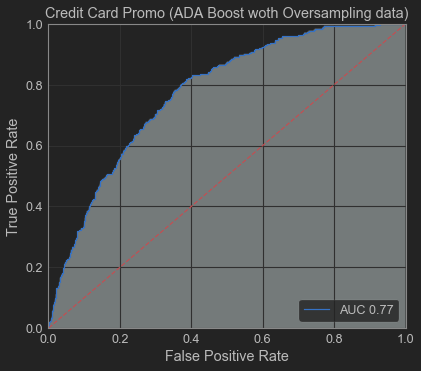

In [51]:
plt.title('Credit Card Promo (ADA Boost woth Oversampling data)')
plt.plot(fprlogov, tprlogov, 'b', label = 'AUC {}'.format(round(roc_auclogov,2)))
plt.legend(loc='lower right') # posisi legend
plt.plot([1,0], [1,0], 'r--') # buat garis lurus dari kiri bawah, ke kanan atas
plt.xlim([0,1]) # sumbu x minimal di 0 maksimal di 1
plt.ylim([0,1]) # sumbu y minimal di 0 maksimal di 1
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fprlogov, tprlogov, 0, facecolor='azure',alpha=0.4)
plt.show()

In [52]:
dst_ov = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=8,
                             max_features=26,random_state=3,
                             min_samples_leaf=49,max_leaf_nodes=28,class_weight='balanced')
dst_ov.fit(X_up,y_up)
dst_predov = dst_ov.predict(X_test)
dst_probov = dst_ov.predict_proba(X_test)
print(classification_report(y_test,dst_predov))
print(confusion_matrix(y_test,dst_predov))

              precision    recall  f1-score   support

           0       0.98      0.48      0.64      5079
           1       0.09      0.84      0.16       314

    accuracy                           0.50      5393
   macro avg       0.54      0.66      0.40      5393
weighted avg       0.93      0.50      0.62      5393

[[2438 2641]
 [  49  265]]


In [53]:
adaov = AdaBoostClassifier(base_estimator=dst_ov, n_estimators=10, 
                         learning_rate=0.11, algorithm='SAMME',random_state=2)
adaov.fit(X_up,y_up)
ada_predov = adaov.predict(X_test)
ada_probov = adaov.predict_proba(X_test)
print(classification_report(y_test,ada_predov))
print(confusion_matrix(y_test,ada_predov))

              precision    recall  f1-score   support

           0       0.98      0.55      0.70      5079
           1       0.10      0.82      0.18       314

    accuracy                           0.56      5393
   macro avg       0.54      0.68      0.44      5393
weighted avg       0.93      0.56      0.67      5393

[[2771 2308]
 [  56  258]]


In [54]:
probadaov = ada_probov[:,1]
fprov, tprov, thresholdov = roc_curve(y_test, probadaov)
roc_aucov = auc(fprov, tprov)

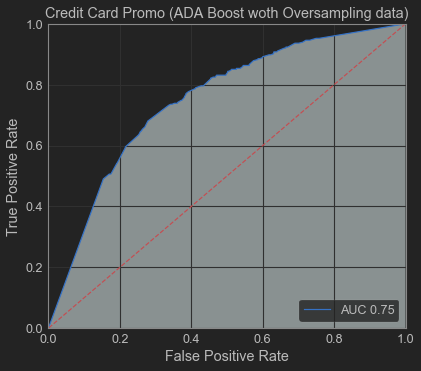

In [55]:
plt.title('Credit Card Promo (ADA Boost woth Oversampling data)')
plt.plot(fprov, tprov, 'b', label = 'AUC {}'.format(round(roc_aucov,2)))
plt.legend(loc='lower right') # posisi legend
plt.plot([1,0], [1,0], 'r--') # buat garis lurus dari kiri bawah, ke kanan atas
plt.xlim([0,1]) # sumbu x minimal di 0 maksimal di 1
plt.ylim([0,1]) # sumbu y minimal di 0 maksimal di 1
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.fill_between(fprov, tprov, 0, facecolor='azure',alpha=0.5)
plt.show()

## PCA

In [57]:
Up_X = upsampleDF.drop('Offer_Accepted',axis=1)
Up_y = upsampleDF['Offer_Accepted']
print(Up_X)
print(Up_y)

       Bank_Accnt_Open  Household_Size  Homes_Owned  Credit_Rating  \
16511                1               3            2              2   
7683                 1               3            1              1   
9189                 1               4            1              1   
13376                1               3            1              1   
647                  2               3            1              3   
...                ...             ...          ...            ...   
7830                 1               4            1              3   
11378                1               3            1              2   
17817                1               3            1              3   
17174                1               4            3              1   
6028                 1               4            1              2   

       Average_Balance  Q1_Balance  Q2_Balance  Q3_Balance  Q4_Balance  \
16511          1104.25      2056.0      1013.0       801.0       547.0   
7683       

In [58]:
scaler = StandardScaler()
scaler.fit(Up_X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [60]:
scaler_data=scaler.transform(Up_X)
scaler_data

array([[-0.54690098, -0.43890285,  1.83718007, ..., -2.03279083,
         2.11014429, -0.10763051],
       [-0.54690098, -0.43890285, -0.47751869, ...,  0.49193453,
        -0.47390124, -0.10763051],
       [-0.54690098,  0.45847345, -0.47751869, ...,  0.49193453,
        -0.47390124, -0.10763051],
       ...,
       [-0.54690098, -0.43890285, -0.47751869, ...,  0.49193453,
        -0.47390124, -0.10763051],
       [-0.54690098,  0.45847345,  4.15187883, ..., -2.03279083,
        -0.47390124,  9.29104566],
       [-0.54690098,  0.45847345, -0.47751869, ...,  0.49193453,
        -0.47390124, -0.10763051]])

In [61]:
pca = PCA(n_components=10)
pca.fit(scaler_data)
pca_x=pca.transform(scaler_data)
pca_x

array([[ 3.17846271, -1.10183854,  0.79363145, ...,  0.96788954,
         2.10107895, -0.50705337],
       [-0.13669513,  2.1451131 ,  0.9281766 , ..., -0.59422405,
        -0.29083762, -0.59452308],
       [-2.21782137, -2.30887101,  0.71928526, ..., -0.13953352,
         0.61258164,  2.13038218],
       ...,
       [-0.99315443,  0.2981489 ,  0.70724047, ...,  0.06826683,
         0.68220724, -0.96075868],
       [ 2.66913844, -5.62062203, -1.3590433 , ...,  0.54417164,
         0.19931559, -0.55024796],
       [-0.5085796 ,  0.90215013,  0.32497301, ..., -2.07202567,
        -0.95656525,  2.38363652]])

In [62]:
y_up=y_up.reset_index()
y_up=y_up['Offer_Accepted']
y_up

0        0
1        0
2        0
3        0
4        0
        ..
23747    1
23748    1
23749    1
23750    1
23751    1
Name: Offer_Accepted, Length: 23752, dtype: int64

In [63]:
pca_df = pd.DataFrame(pca_x,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])
pca_df['target']= y_up
pca_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,target
0,3.178463,-1.101839,0.793631,-0.890274,0.136060,-1.373735,-1.500904,0.967890,2.101079,-0.507053,0
1,-0.136695,2.145113,0.928177,-1.523430,0.224473,2.475097,-0.303298,-0.594224,-0.290838,-0.594523,0
2,-2.217821,-2.308871,0.719285,-0.998119,-1.465045,-0.190648,-1.812167,-0.139534,0.612582,2.130382,0
3,-2.152721,-2.382002,0.115132,-1.553178,0.875012,-1.328481,0.409657,-1.303960,0.036832,-0.697406,0
4,-0.494846,1.010242,0.513527,-0.669575,0.257988,-1.635894,-1.429686,1.080484,2.091562,-0.214497,0
...,...,...,...,...,...,...,...,...,...,...,...
23747,0.093136,2.098476,-1.312052,0.574800,0.264598,2.846625,-0.286147,-0.251055,0.517015,-0.708679,1
23748,-2.367545,-2.925484,2.757640,1.826864,-1.784211,-1.484516,0.849058,-1.273349,-0.135707,1.556194,1
23749,-0.993154,0.298149,0.707240,-1.003015,-1.691626,0.553956,-1.704699,0.068267,0.682207,-0.960759,1
23750,2.669138,-5.620622,-1.359043,-0.653083,0.625446,2.958093,-0.064456,0.544172,0.199316,-0.550248,1


In [64]:
sum(pca.explained_variance_)

18.92362022334177

<Figure size 1440x1224 with 0 Axes>

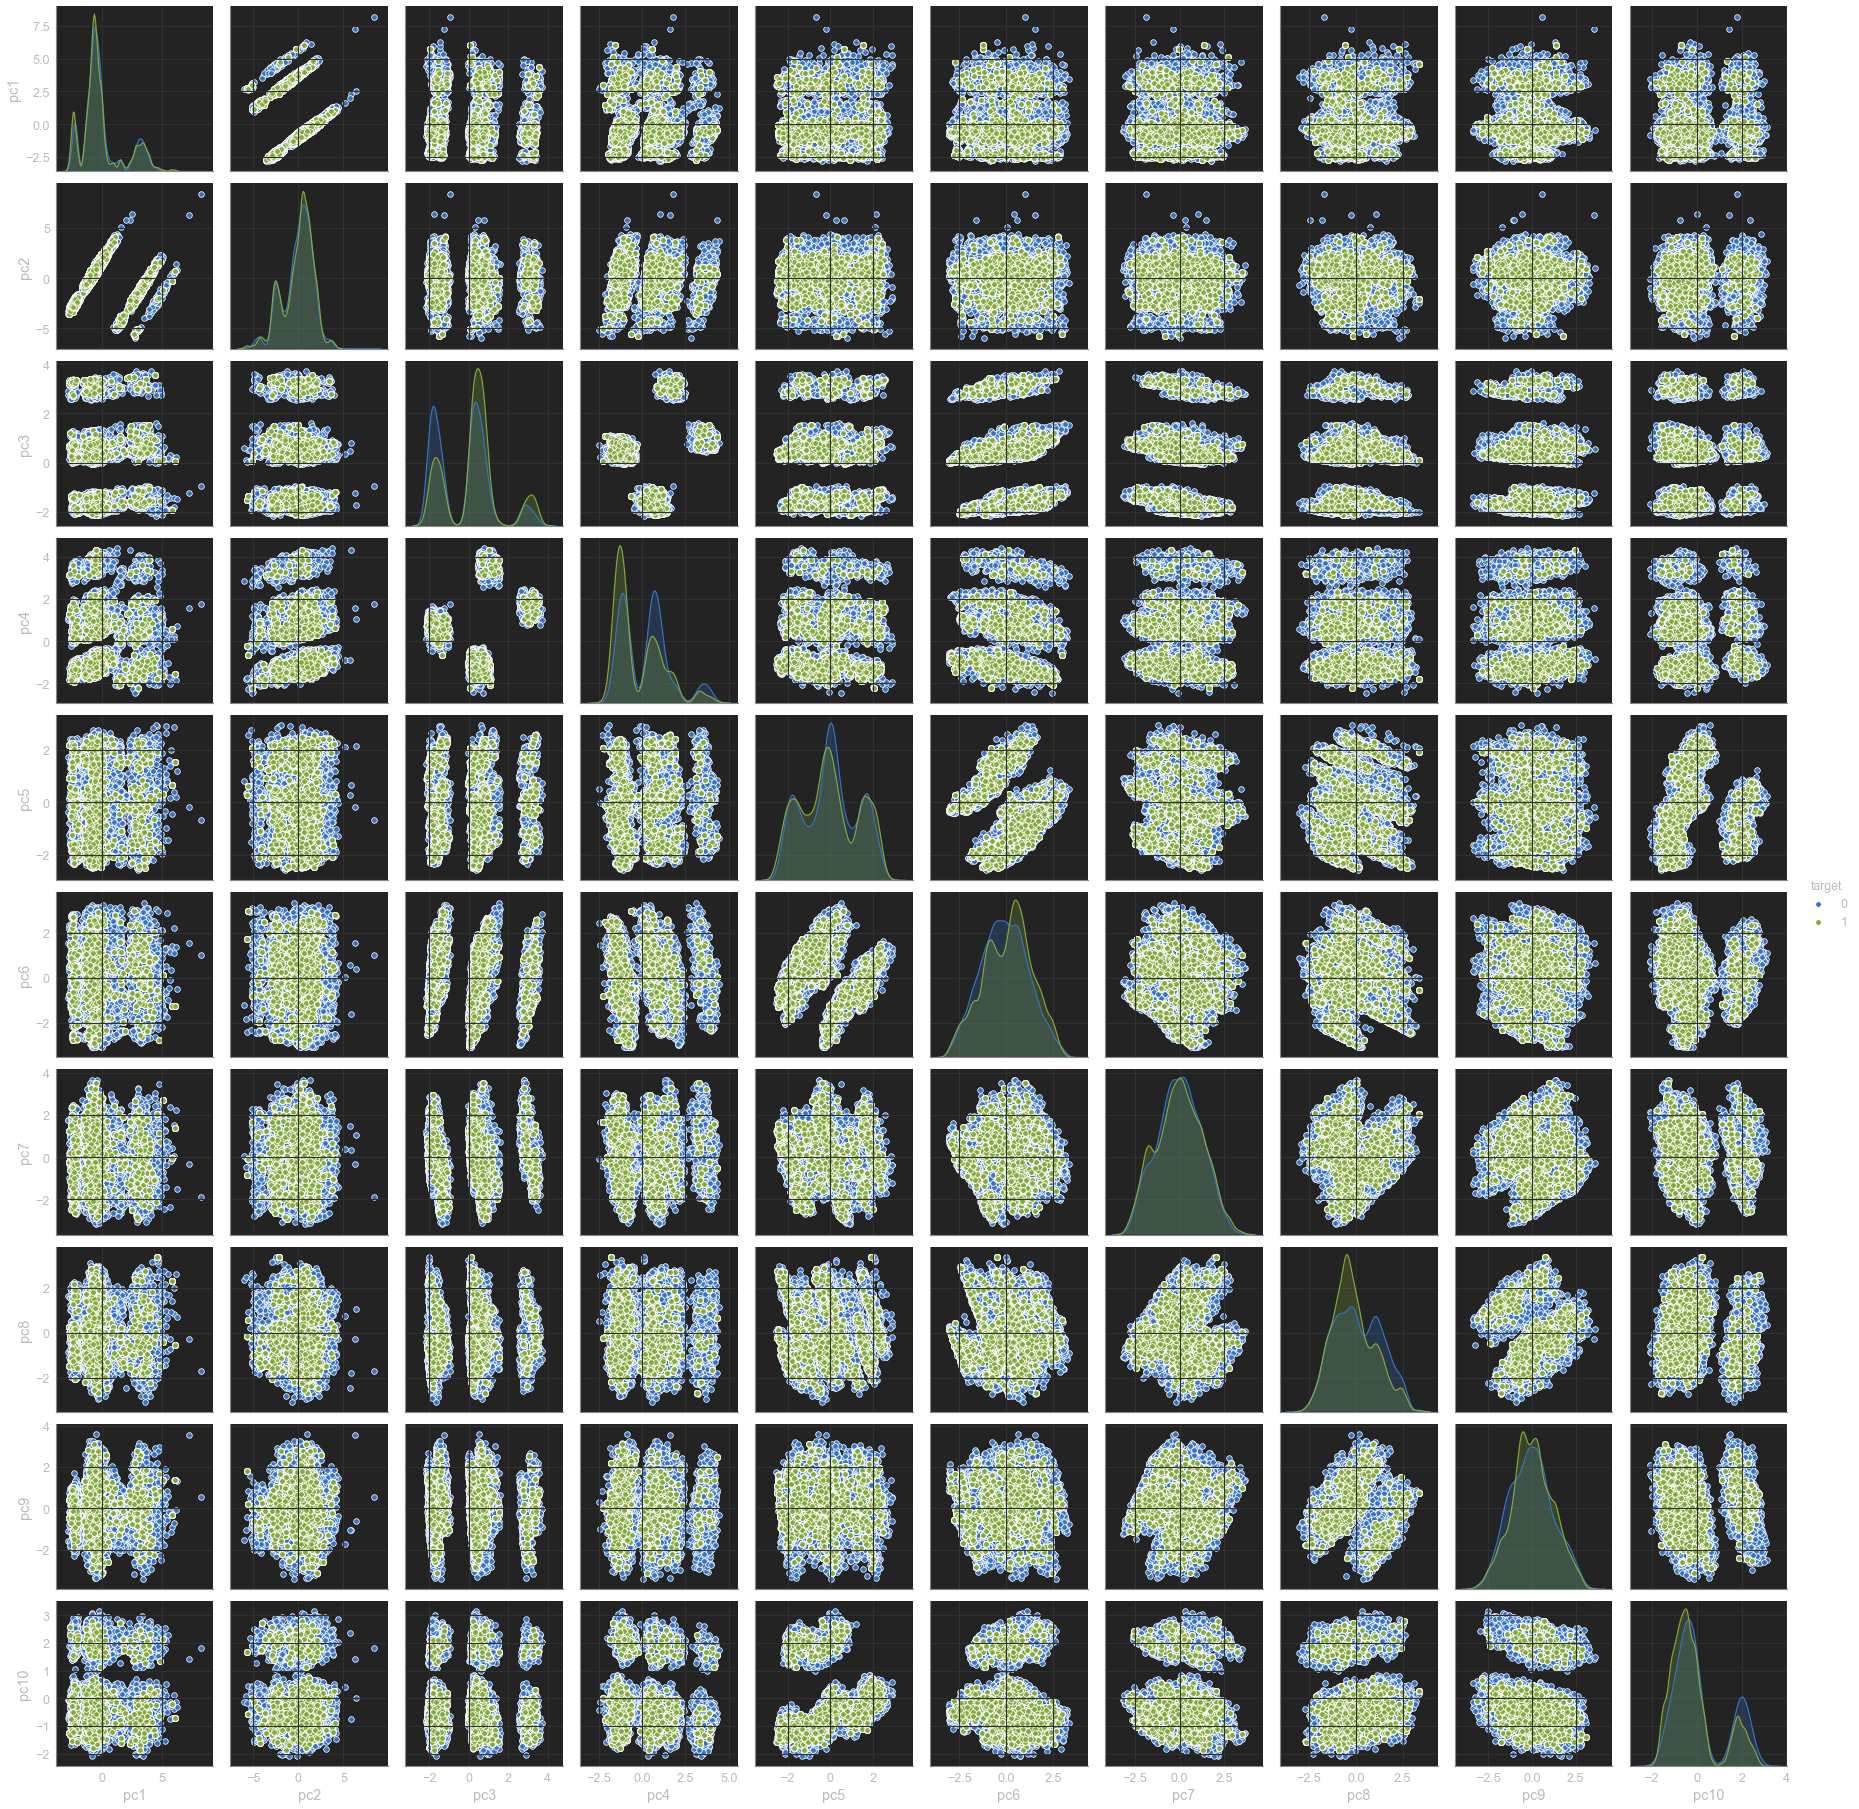

In [67]:
plt.figure(figsize=(20,17))
sns.pairplot(pca_df,hue='target')

In [71]:
dt = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=5, max_depth=1)
adapce=AdaBoostClassifier(base_estimator=dt, n_estimators=1000, learning_rate=0.1, algorithm='SAMME.R')
adapce.fit(pca_df.drop('target', axis=1), pca_df['target'])

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [72]:
scaled_Xtest = scaler.transform(X_test)
Xtest_pca = pca.transform(scaled_Xtest)
Xtest_pca

array([[ 3.52730123, -0.42577776,  0.47221232, ...,  1.20240546,
        -1.73517965, -0.051313  ],
       [-0.42886313,  1.21202909,  0.22733395, ...,  1.09533529,
        -0.76838369, -0.91489334],
       [-0.76392344, -0.12221047, -1.96099548, ..., -0.95551921,
         0.249531  , -0.75258085],
       ...,
       [-0.32754286,  0.69220557, -1.85320124, ...,  2.09021962,
         1.03852894,  1.7390229 ],
       [-0.22153643,  1.2643164 , -1.8486303 , ...,  2.49134445,
         1.15596659, -0.98347992],
       [-2.14259587, -2.25317168,  0.12347241, ..., -0.89671811,
        -0.07334843, -0.15254981]])

In [73]:
adapce_pred=adapce.predict(Xtest_pca)

In [74]:
print(confusion_matrix(y_test,adapce_pred))
print(classification_report(y_test,adapce_pred))

[[3492 1587]
 [ 131  183]]
              precision    recall  f1-score   support

           0       0.96      0.69      0.80      5079
           1       0.10      0.58      0.18       314

    accuracy                           0.68      5393
   macro avg       0.53      0.64      0.49      5393
weighted avg       0.91      0.68      0.77      5393



## Randomized Search

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
random_grid = {
    # n_estimators = jumlah decision trees
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    # Number of features
    'max_features': ['auto', 'sqrt'],
    # kedalaman pohon
    'max_depth': [int(x) for x in np.linspace(start=10,stop=110,num=11)],
    # minimum sample untuk di-split
    'min_samples_split': [int(x) for x in np.linspace(start=100, stop=1000, num=100)],
    # bootstrap
    'bootstrap': [True, False]
}
rf_random = RandomizedSearchCV(estimator= rfc,
                              param_distributions= random_grid,
                              n_iter=10, cv=3, n_jobs=-1, scoring='accuracy')
rf_random.fit(X_up, y_up)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [79]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 400,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [81]:
rfc_rand = rf_random.best_estimator_

In [82]:
rand_pred = rfc_rand.predict(X_test)
rand_proba = rfc_rand.predict_proba(X_test)
print(classification_report(y_test, rand_pred))
print(confusion_matrix(y_test, rand_pred))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84      5079
           1       0.13      0.62      0.22       314

    accuracy                           0.74      5393
   macro avg       0.55      0.68      0.53      5393
weighted avg       0.92      0.74      0.81      5393

[[3783 1296]
 [ 119  195]]


# Feature Importance

In [103]:
new_DF

,Credit_Rating,Reward_Cash Back,income_Low,mailer_Letter,mailer_Postcard,Q4_Balance,income_High,Q1_Balance,Q2_Balance,Q3_Balance,Household_Size,Reward_Points,CC_1,CC_2,income_Medium,Bank_Accnt_Open,hold_home_1,Reward_Air Miles,Homes_Owned,Average_Balance,Offer_Accepted
16511,2,0,0,0,1,547.0,0,2056.0,1013.0,801.0,3,0,0,1,1,1,0,1,2,1104.25,0
7683,1,0,1,0,1,1932.0,0,545.0,1398.0,1233.0,3,0,1,0,0,1,1,1,1,1277.00,0
9189,1,0,0,0,1,400.0,1,476.0,34.0,200.0,4,0,0,1,0,1,1,1,1,277.50,0
13376,1,0,0,0,1,300.0,0,160.0,463.0,95.0,3,1,0,0,1,1,1,0,1,254.50,0
647,3,0,0,0,1,716.0,0,1870.0,1271.0,678.0,3,0,0,1,1,2,1,1,1,1133.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,3,0,1,1,0,1251.0,0,749.0,1731.0,1506.0,4,0,1,0,0,1,1,1,1,1309.25,1
11378,2,0,0,0,1,72.0,1,325.0,199.0,195.0,3,1,0,1,0,1,1,0,1,197.75,1
17817,3,0,1,0,1,968.0,0,878.0,871.0,808.0,3,0,0,1,0,1,1,1,1,881.25,1
17174,1,0,1,1,0,206.0,0,33.0,121.0,290.0,4,0,1,0,0,1,0,1,3,162.50,1


In [104]:
new_DF.corr()

,Credit_Rating,Reward_Cash Back,income_Low,mailer_Letter,mailer_Postcard,Q4_Balance,income_High,Q1_Balance,Q2_Balance,Q3_Balance,Household_Size,Reward_Points,CC_1,CC_2,income_Medium,Bank_Accnt_Open,hold_home_1,Reward_Air Miles,Homes_Owned,Average_Balance,Offer_Accepted
Credit_Rating,1.000000,-0.017607,-0.022948,0.047528,-0.047528,-0.005047,0.011297,0.007931,-0.019573,-0.033984,0.011815,-0.019493,-0.023543,0.025445,0.012068,-0.021409,-0.000152,0.035306,-0.006934,-0.018421,-0.315611
Reward_Cash Back,-0.017607,1.000000,0.018323,0.022059,-0.022059,0.021719,-0.009781,0.030703,0.038609,0.025712,0.037022,-0.447619,0.003615,0.015371,-0.009015,0.031178,-0.003218,-0.479696,0.006789,0.044981,-0.159781
income_Low,-0.022948,0.018323,1.000000,-0.029977,0.029977,-0.013663,-0.347568,-0.018002,0.014713,0.008234,-0.010983,-0.018683,-0.005428,-0.000916,-0.643973,-0.019160,0.024550,0.001496,-0.030053,-0.005159,0.151844
mailer_Letter,0.047528,0.022059,-0.029977,1.000000,-1.000000,-0.024781,0.019226,0.006653,-0.003148,-0.018686,0.022510,0.016326,-0.022345,0.015505,0.012119,-0.017153,-0.017823,-0.036290,0.019647,-0.015207,-0.210716
mailer_Postcard,-0.047528,-0.022059,0.029977,-1.000000,1.000000,0.024781,-0.019226,-0.006653,0.003148,0.018686,-0.022510,-0.016326,0.022345,-0.015505,-0.012119,0.017153,0.017823,0.036290,-0.019647,0.015207,0.210716
Q4_Balance,-0.005047,0.021719,-0.013663,-0.024781,0.024781,1.000000,-0.016577,-0.225908,0.181146,0.570783,0.027863,-0.047172,-0.001107,0.011146,0.026199,-0.017311,0.001179,0.026329,-0.008868,0.577573,0.001113
income_High,0.011297,-0.009781,-0.347568,0.019226,-0.019226,-0.016577,1.000000,0.023639,-0.007528,0.003774,0.012930,0.019429,-0.031644,0.032000,-0.493526,0.010125,-0.015009,-0.010076,0.014188,0.002960,-0.111982
Q1_Balance,0.007931,0.030703,-0.018002,0.006653,-0.006653,-0.225908,0.023639,1.000000,0.478316,-0.073614,-0.019299,0.005061,-0.008407,0.031053,-0.002590,0.013889,-0.018839,-0.033179,0.021368,0.481470,-0.052466
Q2_Balance,-0.019573,0.038609,0.014713,-0.003148,0.003148,0.181146,-0.007528,0.478316,1.000000,0.483766,-0.017937,0.000083,-0.009437,0.017243,-0.007505,-0.028691,-0.037735,-0.035559,0.035680,0.803853,-0.022072
Q3_Balance,-0.033984,0.025712,0.008234,-0.018686,0.018686,0.570783,0.003774,-0.073614,0.483766,1.000000,0.015416,-0.036477,-0.014412,0.019497,-0.010716,-0.006851,-0.030841,0.012165,0.025531,0.747165,0.016704


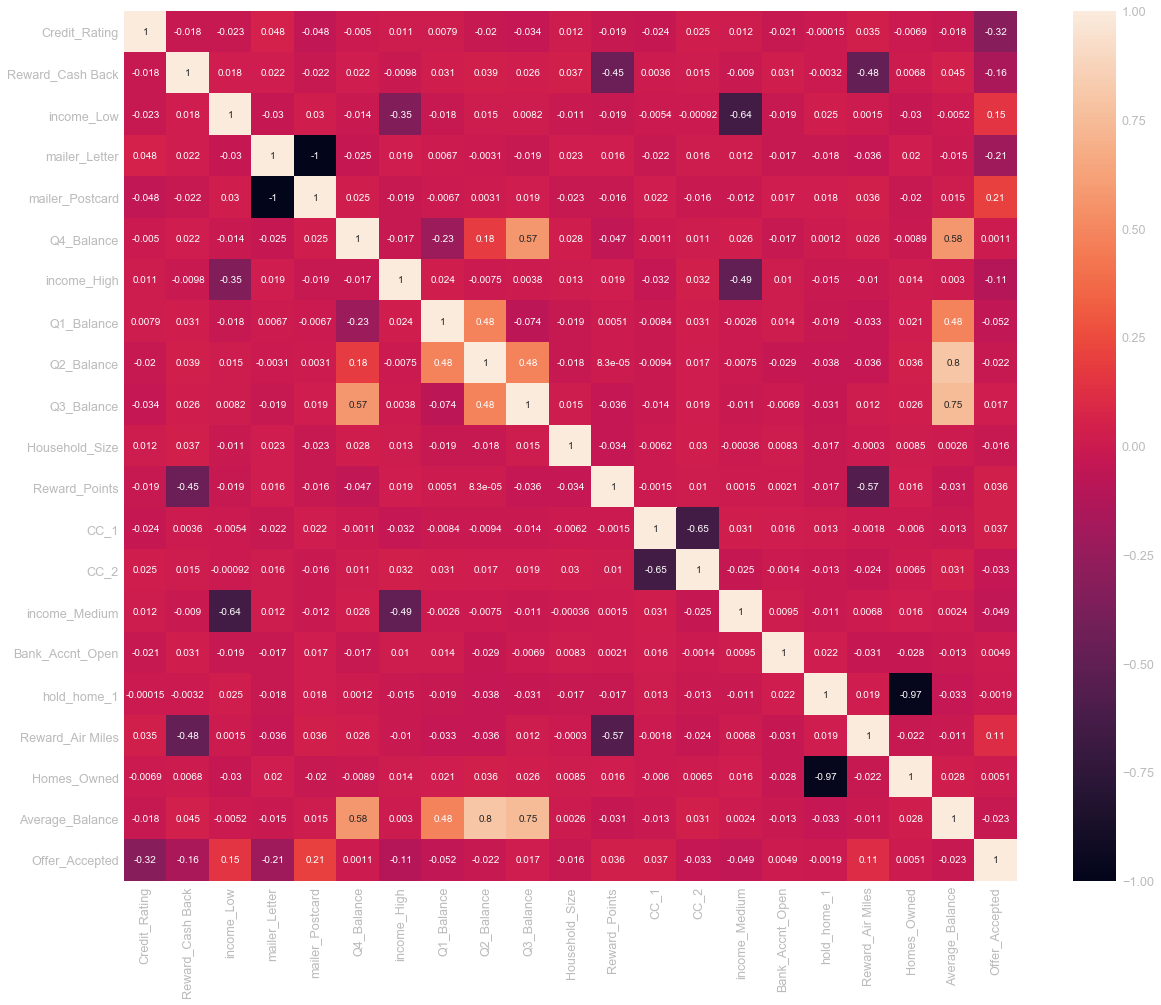

In [105]:
plt.figure(figsize=(20,16))
sns.heatmap(data=new_DF.corr(),annot=True)

In [106]:
XL_og = new_DF.drop('Offer_Accepted',axis=1)
yL_og = new_DF['Offer_Accepted']

In [112]:
lgrs = LogisticRegression(penalty='none',class_weight='balanced',multi_class='multinomial',solver='newton-cg')
XL_train, XL_test, yL_train, yL_test = train_test_split(XL_og, yL_og, test_size=0.2, random_state=50)
lgrs.fit(XL_train,yL_train)
newpred = lgrs.predict(XL_test)
newprob = lgrs.predict_proba(XL_test)
print(classification_report(yL_test, newpred))
print(confusion_matrix(yL_test, newpred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67      2359
           1       0.67      0.73      0.70      2392

    accuracy                           0.69      4751
   macro avg       0.69      0.69      0.68      4751
weighted avg       0.69      0.69      0.68      4751

[[1499  860]
 [ 634 1758]]


In [114]:
lgrs = LogisticRegression(penalty='none',class_weight='balanced',max_iter=1000,
                          multi_class='multinomial',solver='newton-cg')
lgrs.fit(XL_train,yL_train)
newpred = lgrs.predict(XL_test)
newprob = lgrs.predict_proba(XL_test)
print(classification_report(yL_test, newpred))
print(confusion_matrix(yL_test, newpred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67      2359
           1       0.67      0.73      0.70      2392

    accuracy                           0.69      4751
   macro avg       0.69      0.69      0.68      4751
weighted avg       0.69      0.69      0.68      4751

[[1499  860]
 [ 634 1758]]


In [111]:
print(classification_report(yL_test, newpred))
print(confusion_matrix(yL_test, newpred))

              precision    recall  f1-score   support

           0       0.71      0.64      0.67      2359
           1       0.67      0.74      0.70      2392

    accuracy                           0.69      4751
   macro avg       0.69      0.69      0.69      4751
weighted avg       0.69      0.69      0.69      4751

[[1503  856]
 [ 624 1768]]


In [113]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.65      0.78      5079
           1       0.12      0.77      0.21       314

    accuracy                           0.65      5393
   macro avg       0.55      0.71      0.49      5393
weighted avg       0.93      0.65      0.75      5393

[[3283 1796]
 [  71  243]]
